In [66]:
## predict chances of survival based on titanic data set.
## relevant features: Pclass, Sex, Age, Fare ----> 4D feature space
## target variable: Survived

%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [8]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
relevant_df = df[["Survived", "Pclass", "Sex", "Age", "Fare"]]
relevant_df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [24]:
independent_vars = relevant_df.drop(["Survived"], axis=1)
target_var = relevant_df["Survived"]
independent_vars.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [30]:
# encoding text inputs in the Sex feature

le = LabelEncoder()

# append encoded column to the table 
independent_vars["encoded_sex"] = le.fit_transform(independent_vars["Sex"])

# dropping the text based column
independent_vars = independent_vars.drop(["Sex"], axis=1)

independent_vars

,Pclass,Age,Fare,encoded_sex
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1
...,...,...,...,...
886,2,27.0,13.0000,1
887,1,19.0,30.0000,0
888,3,NaN,23.4500,0
889,1,26.0,30.0000,1


In [43]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(independent_vars, target_var, 
                                                    test_size=0.3, random_state=10)
print("X train set size: ",len(X_train))
print("X test set size: ",len(X_test))
print("y train set size: ",len(y_train))
print("y train set size: ",len(y_test))

X train set size:  623
X test set size:  268
y train set size:  623
y train set size:  268


In [44]:
# training the classifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [46]:
# scoring the model based on the test set 
model.score(X_test, y_test)

# almost 77% accurate with a random state of 42
# when random state changed to 10 ---> accuray boosted to 82%

0.8208955223880597

In [47]:
model.predict(X_test)

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1])

In [69]:
lst = os.listdir('.')
lst

['.ipynb_checkpoints',
 'salaries.csv',
 'salary_classifier.ipynb',
 'titanic.csv',
 'titanic_classifier_structure.pdf',
 'titanic_classifier_structure.png',
 'titanic_survival_classification.ipynb']

Already downloaded.
Already downloaded.


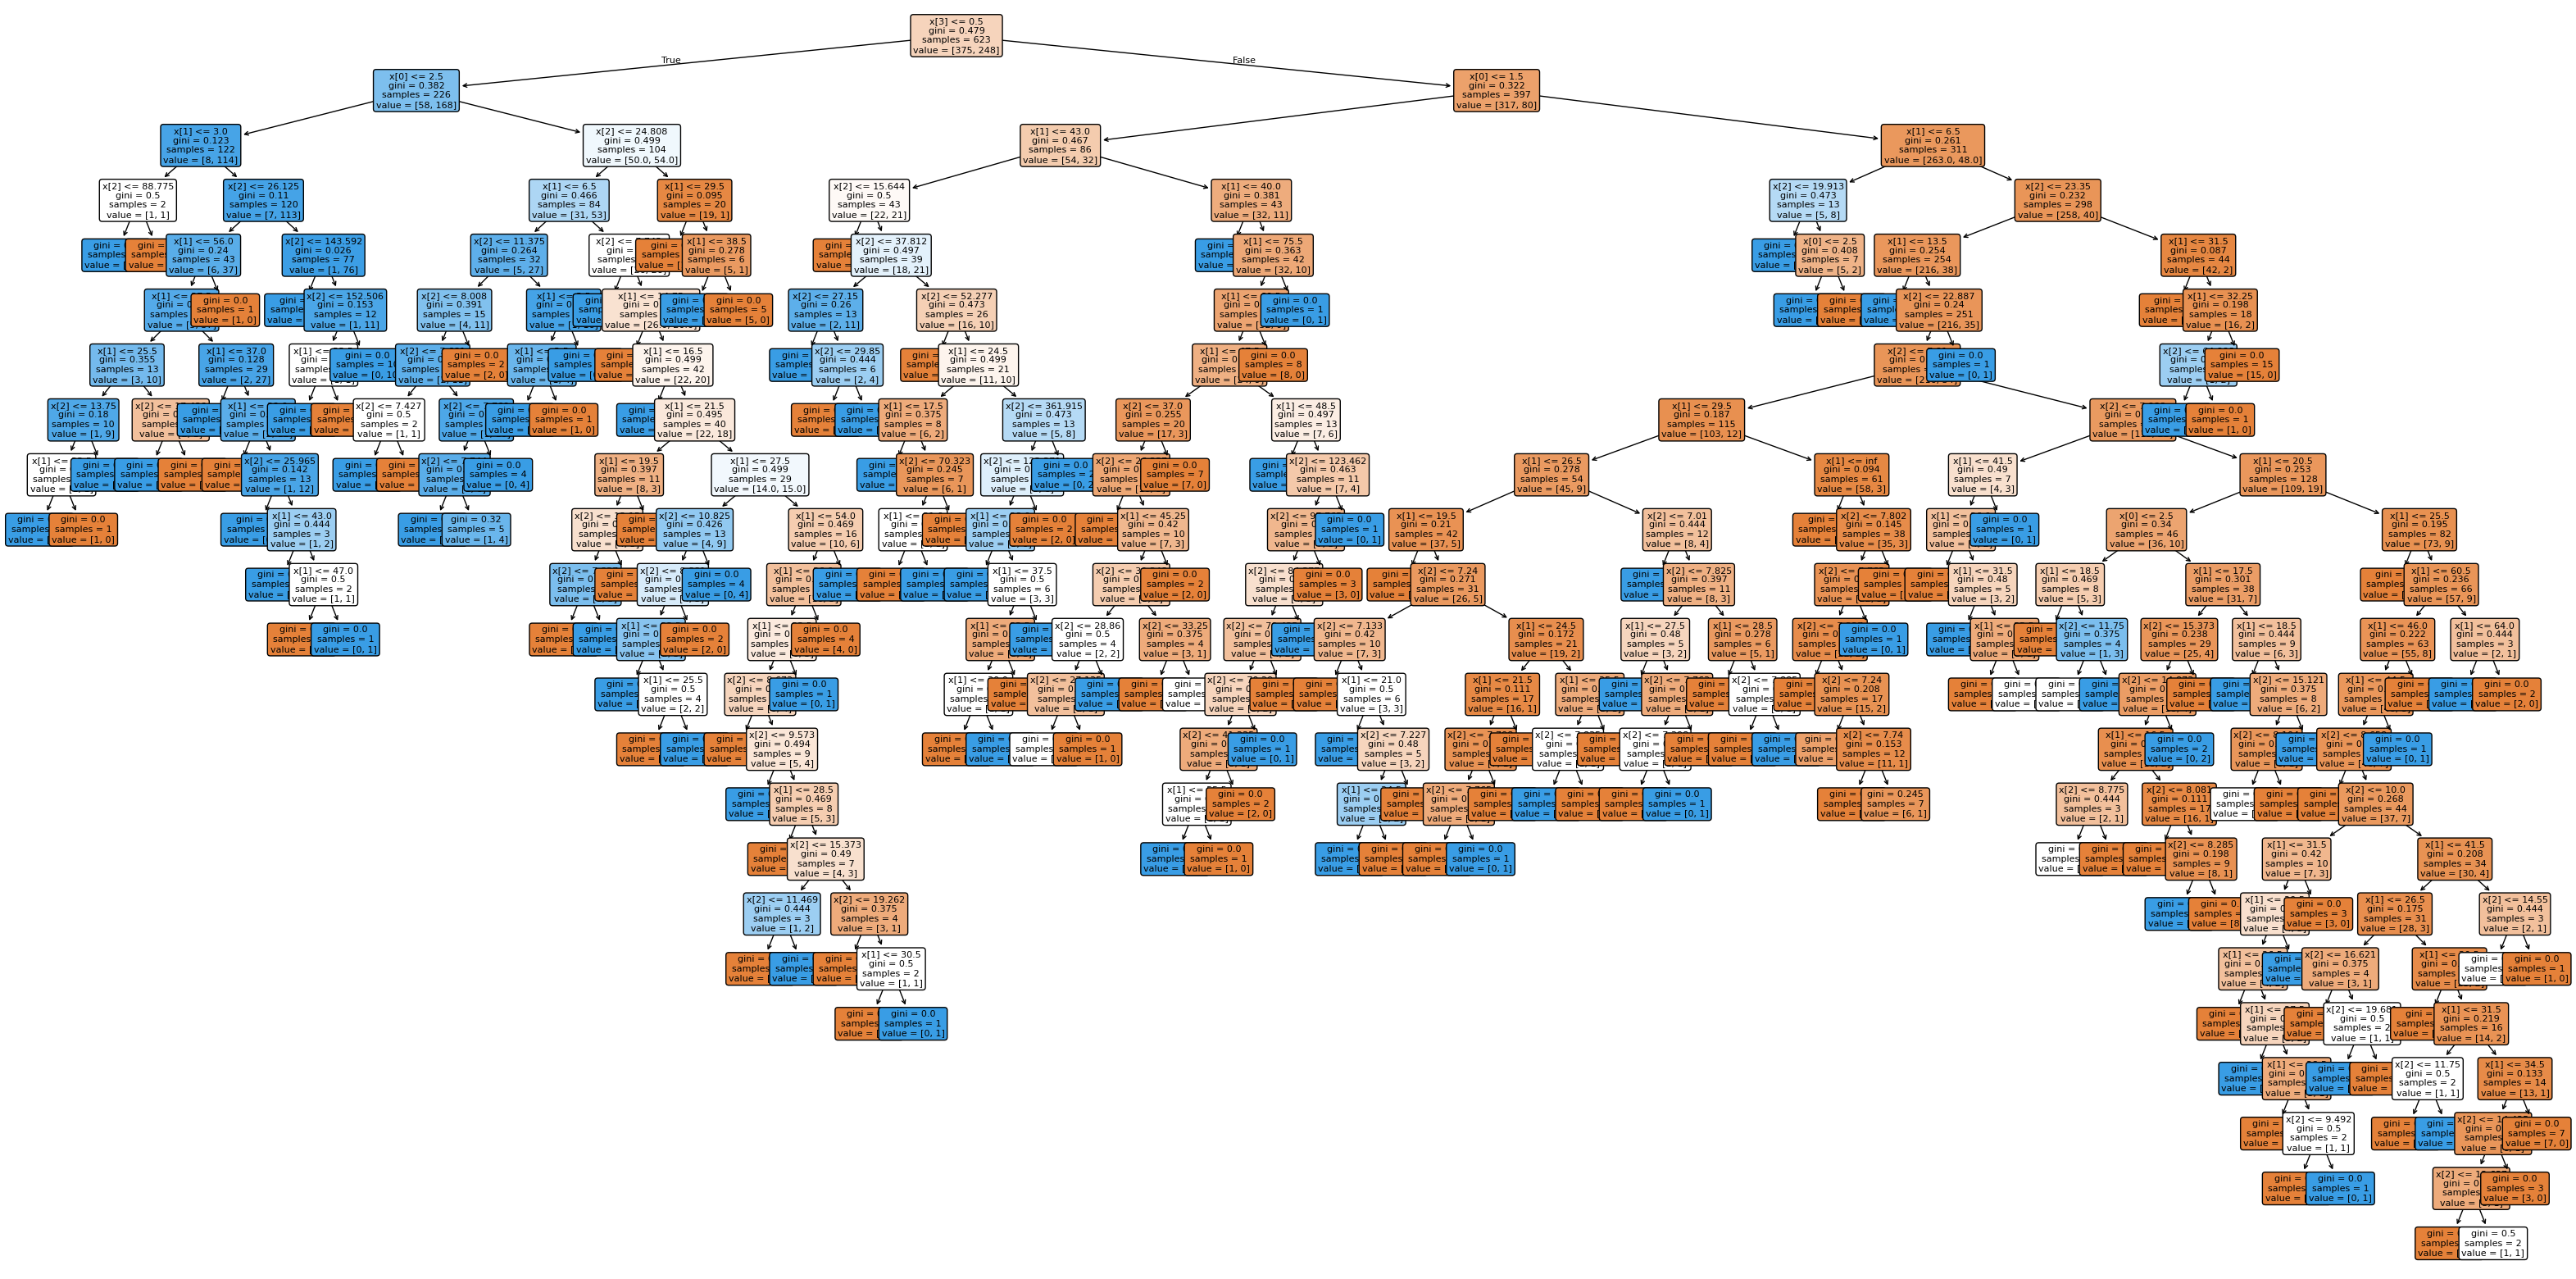

In [70]:
# visualizing the decision tree structure

fig = plt.figure(figsize=(40,20))
plot_tree(model, filled=True, rounded=True, fontsize=8)
plt.savefig("titanic_classifier_structure.png") if "titanic_classifier_structure.png" not in lst else print("Already downloaded.") 
plt.savefig("titanic_classifier_structure.pdf") if "titanic_classifier_structure.pdf" not in lst else print("Already downloaded.")
plt.show()
